# This notebook contains the solution for task 2 (Astrophysical Absorption Line Exercise)
***
This is the short version of the solution for the second task. It only contains to-the-point, direct answers for the task. Check the Detailed solution for a comprehensive explanation of *how* I got these results.
***
By : [Naimish Mani B](https://www.github.com/Naimish240)
***
From the problem statement, we know that we need to generate the spectrum of light after it passes through a slab of gas.
***
## TOC:
* [PREFACE](#first-bullet)
* [CODE](#code-bullet)
* [Part 1](#second-bullet)
* [Part 2](#sec-bullet)
* [Part 3](#third-bullet)
    - [Note](#note-bullet)
    - [Similarities](#sim-bullet)
    - [Differences](#diff-bullet)
* [Improvements](#imp-bullet)
***
# **PREFACE** <a class="anchor" id="first-bullet"></a>

The formula for this has been provided, and is as follows:
1. Formula for the Absorption Coefficient
$$
\alpha(\upsilon) = \frac{e^{2}fn_{H}}{4\pi m_ec}\frac{(1-x)g_o}{Z}\frac{G}{(\upsilon - \upsilon_{0})^{2}+(\frac{G}{4\pi})^{2}}
$$

2. Formula for Intensity
$$
I(\lambda) = e^{-\alpha(\upsilon)d}
$$

From these formulae, we know that the conditions for us to get the condition

$$
I = 0
$$

are either

$$
d = \infty
$$

or

$$
\upsilon_{0} = \upsilon
$$

Ignoring the first case, this leaves us with the solutions

$$
\lambda = 121.651048, \upsilon_{0} = 2.46607 \times 10^{15} Hz
$$
$$
\lambda = 121.638717, \upsilon_{0} = 2.46632 \times 10^{15} Hz
$$

NOTE : We use c = 3 * 10 ^ 10 cm/s.
***
# **Code** <a class="anchor" id="code-bullet"></a>

In [1]:
# Imports and Consts
import matplotlib.pyplot as plt
from math import pi, exp

# Slab Properties
nH = 0.1  # cm -3
x = 0.1
# Hydrogen Properties (Lyman)
G = 6.265e8  # s -1
f = 0.4164
g0 = 2
Z = 2.0
# Other consts
me = 9.11e-28  # g
c = 3e10  # cm s -1
e = 4.80e-10  # cm 3/2 g 1/2 s-1

In [2]:
# Implement the formulae
# Implementing Formula for Absorption Coefficient
def calcAlpha(v, v0):
    '''
    Inputs :
        v : Frequency
        v0 : Central Frequency

    Output :
        a : Absorption Coefficient

    Formula taken from task 2 page 2
    '''
    A = (e * e * f * nH) / (4 * pi * me * c)
    B = ((1 - x) * g0) / (Z)
    C = (G) / ((v - v0) ** 2 + (G / (4 * pi)) ** 2)
    a = A * B * C
    return a

# Implementing formula to calculate Intensity
def calcIntensity(l, v0, d):
    '''
    Inputs :
        l : Wavelength
        v0 : Central Frequency
        d : Thickness of slab

    Output :
        I : (Intensity of light)

    Forumla taken from task 2 page 2
    '''
    # Calculates freq. from wavelength
    v = c / l
    # Calculates Alpha for wavelength and central freq.
    a = calcAlpha(v, v0)
    # Calculates Intensity for Alpha and d
    I = exp(a * d * -1)
    # Returns I
    return I

In [3]:
# Implement the spectrum class
class Spectrum(object):
    def __init__(self, v0, d, res, low, up):
        '''
        Inputs :
            v0 : Central Frequency
            d : Thickness of slab
            res : Number of steps between low and up
            low : Lower limit / frequency to start from
            up : Upper limit / frequency to terminate generation at
        '''
        self.v0 = v0
        self.d = d
        self.res = res
        self.low = low / 10 ** 7
        self.up = up / 10 ** 7
        self.wavelengths = []
        self.intensities = []

    def generate(self):
        '''
        Generates list of intensities for the spectrum
        '''
        # Clears list of intensities and wavelengths
        self.intensities = []
        self.wavelengths = []
        # Finds the step value for the simulation
        STEP = (self.up - self.low) / self.res
        # Runs for loop, iterating across all wavelengths
        for i in range(self.res):
            # Wavelength
            w = self.low + (i * STEP)
            # Add wavelength to list of wavelengths
            self.wavelengths.append(w * 10**7)
            # Calculate intensity for wavelength
            intensity = calcIntensity(w, self.v0, self.d)
            # Add intensity to list of intensities
            self.intensities.append(intensity)

    def show(self, save=False):
        plt.plot(self.wavelengths, self.intensities)
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity")
        plt.title("Spectrum")
        plt.show()
        if not save:
            return None

        if not os.path.exists('Plots'):
            os.mkdir('Plots')

        plt.savefig(f'Plots/{self.v0}_{self.d}_{self.res}_{self.low}_{self.up}.jpg')

    def __len__(self):
        return len(self.intensities)

    def __repr__(self):
        return f"Central Frequency : {self.v0}\nThickness of slab : {self.d}"

In [4]:
# Function to print out the import details about the spectrum
def doEverything(obj):
    # Calculate the data required for the plot
    obj.generate()
    # -------------------------------------------------------------------
    # If intensity drops below this value, we assume it to be the start of the fall.
    # If intensity jumps above this value, we assume the fall has ended.
    THRESHOLD = 0.999
    # Initialise the values of these markers
    low = None
    high = None

    # Loop through all the wavelengths in the list to find these values
    for i in range(len(obj.intensities)):
        intensity = obj.intensities[i]
        wavelength = obj.wavelengths[i]

        # If the intensity is dropping below the treshold the first time
        if intensity < THRESHOLD and not low:
            low = wavelength

        # If the intensity jumps above the treshold for the first time
        if intensity > THRESHOLD and low:
            high = wavelength
            # Exit the loop, for obvious reasons
            break
    # -------------------------------------------------------------------
    print("-----------------------------")
    print("Number of wavelengths sampled: ", len(obj))
    print(obj)
    print("Wavelength of Minimum Intensity: ",
          obj.wavelengths[obj.intensities.index(min(obj.intensities))],
          "nm")
    # Now, we print the minimum intensity
    print("Minimum Intensity: ",
          obj.intensities[obj.intensities.index(min(obj.intensities))])
    print("-----------------------------")
    print("The threshold we've set is: ", THRESHOLD)
    print("Lower wavelength is: ", low, "nm")
    print("Upper wavelength is: ", high, "nm")
    print("Bandwidth is: ", high-low, "nm")
    obj.show()
    print("-----------------------------")

***
# **Part (1): Generating the spectrum for the three values of d** <a class="anchor" id="second-bullet"></a>

-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.65104500000001 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.64486000000001 nm
Upper wavelength is:  121.65724 nm
Bandwidth is:  0.012379999999993174 nm


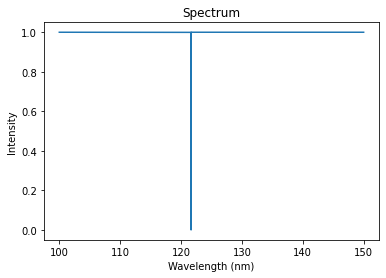

-----------------------------
-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1e+19
Wavelength of Minimum Intensity:  121.65033500000001 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.03523500000001 nm
Upper wavelength is:  122.273165 nm
Bandwidth is:  1.2379299999999915 nm


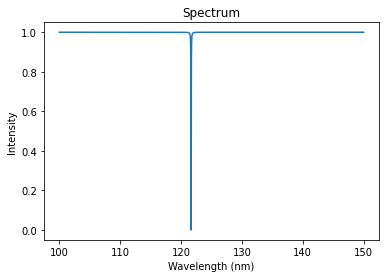

-----------------------------
-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1e+22
Wavelength of Minimum Intensity:  121.628375 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  104.79084 nm
Upper wavelength is:  144.97696000000002 nm
Bandwidth is:  40.18612000000002 nm


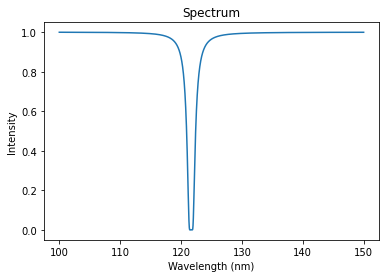

-----------------------------


In [7]:
# v0 to store central frequencies
v0 = [2.46607e15]
# d to store all thicknesses
d = [10e14, 10e18, 10e21]

for i in v0:
    for j in d:
        obj = Spectrum(i, j, 10 ** 7, 100, 150)
        doEverything(obj)

***
# **Task (2): Generate spectrum for all three d's with new value** <a class="anchor" id="sec-bullet"></a>

-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.638715 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.63253 nm
Upper wavelength is:  121.64491000000001 nm
Bandwidth is:  0.012380000000007385 nm


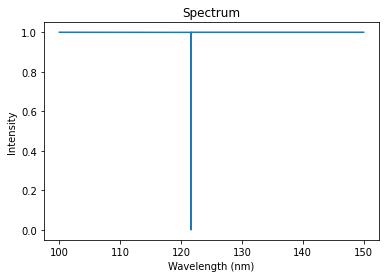

-----------------------------
-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1e+19
Wavelength of Minimum Intensity:  121.638 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.02302500000002 nm
Upper wavelength is:  122.26071 nm
Bandwidth is:  1.2376849999999848 nm


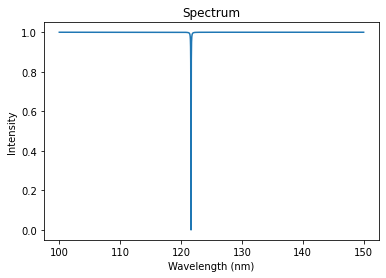

-----------------------------
-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1e+22
Wavelength of Minimum Intensity:  121.61605000000002 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  104.78169000000001 nm
Upper wavelength is:  144.95945 nm
Bandwidth is:  40.17775999999999 nm


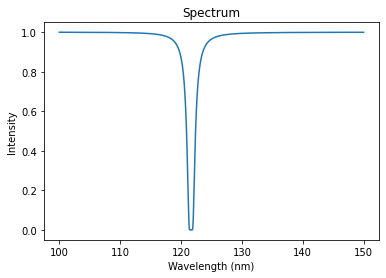

-----------------------------


In [8]:
# v0 to store central frequencies
v0 = [2.46632e15]
# d to store all thicknesses
d = [10e14, 10e18, 10e21]

for i in v0:
    for j in d:
        obj = Spectrum(i, j, 10 ** 7, 100, 150)
        doEverything(obj)

***
# Task (3): Comment on graphs <a class="anchor" id="third-bullet"></a>
***
## NOTE:<a class="anchor" id="note-bullet"></a>

1. As we know, we've focused on a specific transition and spent our time trying to generate that particular spectral line. The transition we were focussing on is that of an electron in the n=1 energy state of a Hydrogen atom which absorbs a photon and jumps up to n=2. We know that the actual value of the wavelength at which this transition occurs is around 121.567 nm. The value we got from the formula came out to be around 121.63 nm, which gives an error of about 0.0518%. *Sub Note : The value of 121.63 is what is expected when we approximate c to 3 x 10 ^ 10 cm/s for both values of v0*

2. Also, the threshold of 0.999 was arbitrarily chosen, to serve as guide posts for further inferences. Their physical meaning is that the intensity of the light observed is less than 0.999. Although this kind of intensity dip is most likely to be indistinguishable from sensor noise in the real world, we roll with it anyway as we're working with noise-less, generated data.

3. Another thing to note here is that the wavelength for the "minimum" intensity observed is found from the smallest element in the list. We have not checked if the minimum intensity value (0) has been observed for multiple wavelengths. This is especially important to make note of in the second set of graphs, where we used v0 = 2.46632 * 10 ^ 15 Hz, because from the generated graphs it looks like there might be multiple wavelengths which are completely absorbed by the atoms. But since this doesn't make much sense (we should have only one wavelength where I = 0), I have written off this issue as an unfortunate consequence of stressing our compute resources beyond it's natural limits.

With these points being addressed, let's move forward with the solution for the this subdivision.
***
## First, let's see the commonalities across all graphs. <a class="same" id="third-bullet"></a>

- The minimum intensity observed for all spectra is 0. This implies that there is atleast one wavelength at which we will observe nothing, i.e., the incident light has been totally absorbed by the gas slab.
- All graphs have a minimum value at about 121.63 nm. This is consistent with what is expected, as has been mentioned in point (1) above and in the preface.
- All graphs tend to follow a similar 'v' shaped pattern, where the intensity of light observed at the end of the slab decreases till it reaches a minimum value of 0, and then it returns back to a steady value of 1.
- The bandwidth of wavelengths where the intensity of the observed light dips below the threshold remains about the same despite the change in central frequency (v0). This suggests that the bandwidth is indepenedent of the central frequency.
- The slope of the bandwidth also appears to remain indepedent of the central frequency, but it has to be verified.
***
## Next, let's look at the differences between the graphs. <a class="anchor" id="diff-bullet"></a>

- When we compare the first set of graphs with their counterparts in the second set, we can see that the graphs in the second set have a slightly lower wavelength at which their intensity becomes 0. This is attrubuted to the fact that the central frequency (v0) changes between the sets.
- The bandwidth of the wavelengths where the intensity of observed light dips below the threshold increases within the set (as the thickness of the slab increases).
- As we increase the distance through which the light travels, more wavelengths appear to get absorbed by the gas slab. This means that for very large distances of travel, we have atleast some of the light getting absorbed along the way without the wavelength being exactly equal to the transition, which implies one of the following cases being true:

    1. We've broken the formula by throwing huge inputs at it.
    2. Electron's are not as picky as we've been led to belive and will absorb any photons regardless of their wavelength, but at a very low probabilities. Hence, we need very long distances for this phenomenon to become prominent enough to be observed.
***

# Further Improvements we could make:<a class="anchor" id="imp-bullet"></a>

1. Increase resolution of graph?
2. Calculate the slope of the graph at every point to get a better comparision between graphs?
2. From the graphs, it looks like there might be cases where we have more than one wavelength at which the observed intensity is 0. But for now, I'm assuming that these cases appear because the computer is breaking here, as we're approaching edge cases here. I might be wrong, but I'd love to learn more about this :)
***